## 数据应用学院 Data Scientist Program Hw2

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [46]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [47]:
# import the necessary package at the very beginning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


## 1. Gnerate x = a sequence of points, y = sin(x)+a where a is a small random error.

In [48]:
## Type Your Answer Below ##
np.random.seed(1)
X = np.random.random([100, 1]).ravel()*10 # generate a set of 100 random float in range [0, 10]
X[:5]

array([  4.17022005e+00,   7.20324493e+00,   1.14374817e-03,
         3.02332573e+00,   1.46755891e+00])

In [49]:
random_error = np.random.randn(100) # genrate a set of 100 random error from a standard normal distribution
random_error[:5]

array([ 0.31563495, -2.02220122, -0.30620401,  0.82797464,  0.23009474])

In [50]:
Y = np.sin(X) + random_error #  y = sin(x)+a where a is a small random error
Y[:5]

array([-0.54095659, -1.22656347, -0.30506026,  0.94596606,  1.22477048])

## 2. Draw a scatter plot of x and y.

X:  (100,)   Y:  (100,)


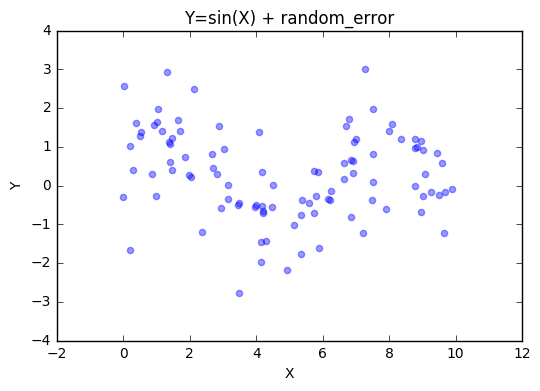

In [51]:
## Type Your Answer Below ##
plt.scatter(x=X, y=Y, marker='o', alpha=0.4, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y=sin(X) + random_error')

print('X: ', X.shape, ' ', 'Y: ', Y.shape )

## 3. Use linear regression model to predict y, with only one feature--x. Please print out the training and validation score of your model and the mathematical formula of your model.

You need to split the data into training and testing data before you build the model. This is the same procedure you need to do in the following questions.

In [52]:
## Type Your Answer Below ##
# reshape X from row vector in shape(100, ) to column vector in shape (100, 1)
X_re = X.reshape(X.shape[0], 1)
X_re.shape

(100, 1)

In [53]:
# initiate a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Use train_test_split to train and test lr
from sklearn import model_selection
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X_re, Y, train_size=70, random_state=1)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(70, 1) (30, 1) (70,) (30,)


The mathematical formula of linear regression model:  Y = [-0.06127138]*X + 0.518283829026 

The coefficient of determination R^2 of the training set:  0.0260961142156 

The coefficient of determination R^2 of the testing set:  -0.0432495670221 



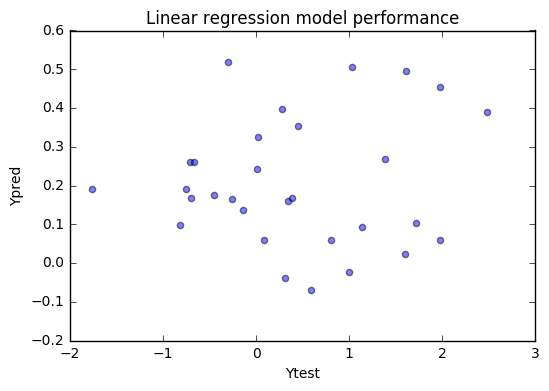

In [55]:
lr.fit(Xtrain, Ytrain)
Ypred = lr.predict(Xtest)
print('The mathematical formula of linear regression model: ', 'Y = ' + str(lr.coef_) + '*' + 'X + ' + str(lr.intercept_), '\n')
print('The coefficient of determination R^2 of the training set: ', lr.score(Xtrain, Ytrain), '\n')
print('The coefficient of determination R^2 of the testing set: ', lr.score(Xtest, Ytest), '\n')
plt.scatter(Ytest, Ypred, marker='o', alpha=0.5)
plt.xlabel('Ytest')
plt.ylabel('Ypred')
plt.title('Linear regression model performance')

In [56]:
# Get the training and validation score of your model 
# training and validation score具体指的什么？

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X_re, Y, cv=3) # 3-fold cross validation
print('cv_scores: ', cv_scores)
print('mean of cv_scores: ', cv_scores.mean())
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

cv_scores:  [-0.07088753  0.02353958  0.00309491]
mean of cv_scores:  -0.0147510135928
Accuracy: -0.01 (+/- 0.08)


怎么理解cv_scores是负数？

## 4. Draw a plot showing your predicted y, real y, and ground truth--sin(x) of x.

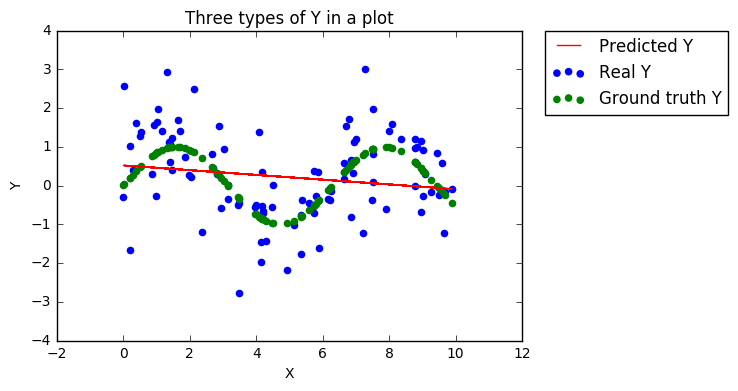

In [57]:
## Type Your Answer Below ##

# show predicted y in red color
Ypred = lr.predict(X_re)
plt.plot(X, Ypred, label='Predicted Y', color='r')

# show real y in blue color
plt.scatter(X, Y, label='Real Y', color='b')

# show ground truth - sin(X) in green color
Yground = np.sin(X)
plt.scatter(X, Yground, label='Ground truth Y', color='g')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Three types of Y in a plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 5. Try to build a linear model using two features--x and x^2. Please print out the training and validation score score and mathematical formula.

In [58]:
## Type Your Answer Below ##
X2 = X_re**2
X2 = np.hstack([X_re, X2])
print(X2.shape)

(100, 2)


In [59]:
lr2 = LinearRegression()
lr2.fit(X2, Y)
cv_scores2 = cross_val_score(lr2, X2, Y, cv=3)
print('cv_scores for model using x and x^2: ', cv_scores2)
print('mean of cv_scores for model using x and x^2: ', cv_scores2.mean())
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores2.mean(), cv_scores2.std() * 2))

print('The mathematical formula of linear regression model: ', 'Y = ' + str(lr2.coef_[0]) + '*X ' + str(lr2.coef_[1]) + "*X^2 + " + str(lr.intercept_), '\n')


cv_scores for model using x and x^2:  [ 0.06808736  0.14728689  0.08146365]
mean of cv_scores for model using x and x^2:  0.0989459636942
Accuracy: 0.10 (+/- 0.07)
The mathematical formula of linear regression model:  Y = -0.530403621048*X 0.0489123266284*X^2 + 0.518283829026 



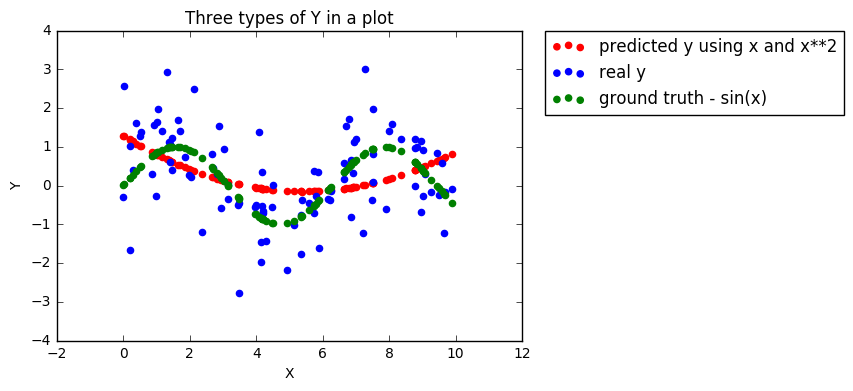

In [60]:
# visualize new set of Ypred, Y, Yground_truth
Ypred2 = lr2.predict(X2)
Yground = np.sin(X)

plt.scatter(X, Ypred2, label='predicted y using x and x**2', color='r')
plt.scatter(X, Y, label='real y', color='b')
plt.scatter(X, Yground, label='ground truth - sin(x)', color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Three types of Y in a plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 6. Try to build linear models with features from x to x, x^2, x^3,... x^15, and plot the changes of training score and validation score with the number of features gets larger. Accoding to the result you get, what's the best number of features here?

In this question, you need to build 15 models, with features of [x],[x,x^2],[x,x^2,x^3],...,[x,x^2,...,x^15]. For each model you need to calculate the training score and validation score then make the plot as we required.

In [61]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


index =[]  # generate an array with number 1 to 15
for i in range(1, 16):
    index.append(i)
    
df = pd.DataFrame(columns = index) # create a new dataframe with 15 columns
df.iloc[:, 0] = X # the 1st column is X**1

mean_cv_scores = []
mean_train_scores = []
mean_valid_scores= []

for i in index:
    print("################  Adding " + "x**" + str(i) + "   ######################")
    df.loc[:, i] = X**i # Add a new column of values
    lr = LinearRegression() # start a new linear regression model with the new column taking into consideration
    #lr.fit(df.iloc[:, :i], Y)
    #Ypredict = lr.predict(df.iloc[:, :i])
    cv_scores = cross_val_score(lr, df.iloc[:, :i], Y, cv=3)
    print("mean cv score for the model is:", np.mean(cv_scores))
    mean_cv_scores.append(np.mean(cv_scores))
    train_score, valid_score = validation_curve(Ridge(), df.iloc[:, :i], Y, "alpha", np.logspace(-7, 3, 3))
    print("mean train score is: ", np.mean(train_score))
    print("mean valid score is: ", np.mean(valid_score))
    mean_train_scores.append(np.mean(train_score))
    mean_valid_scores.append(np.mean(valid_score))
    print()

################  Adding x**1   ######################
mean cv score for the model is: -0.0147510135928
mean train score is:  0.0189172299502
mean valid score is:  -0.00879602164753

################  Adding x**2   ######################
mean cv score for the model is: 0.0989459636942
mean train score is:  0.0929840386224
mean valid score is:  0.0633174935999

################  Adding x**3   ######################
mean cv score for the model is: 0.0148246804904
mean train score is:  0.14414571507
mean valid score is:  0.0227396637785

################  Adding x**4   ######################
mean cv score for the model is: 0.192164632706
mean train score is:  0.286918635916
mean valid score is:  0.139872591395

################  Adding x**5   ######################
mean cv score for the model is: 0.176052739628
mean train score is:  0.368566142196
mean valid score is:  0.193834403906

################  Adding x**6   ######################
mean cv score for the model is: 0.186730405688
mea

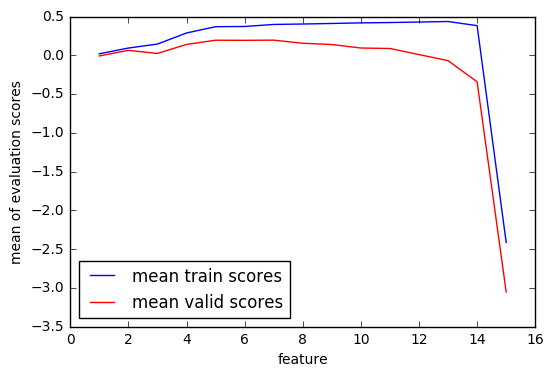

In [62]:
plt.plot(df.columns, mean_train_scores, c='b', label='mean train scores') #plot the training score and validation score showing what happens when feature set gets larger
plt.plot(df.columns, mean_valid_scores, c='r', label = 'mean valid scores') 
plt.xlabel('feature')
plt.ylabel('mean of evaluation scores')
plt.legend(loc=0)

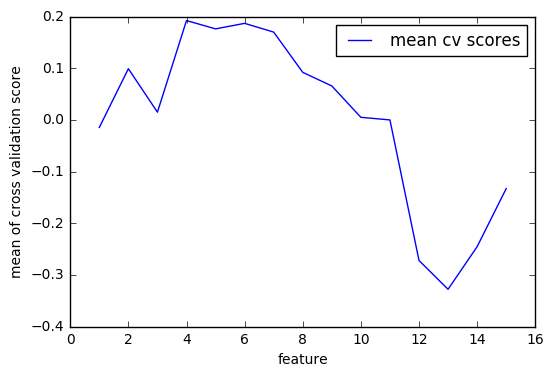

In [63]:
plt.plot(df.columns, mean_cv_scores, label='mean cv scores') #plot the training score and validation score showing what happens when feature set gets larger
plt.xlabel('feature')
plt.ylabel('mean of cross validation score')
plt.legend(loc=0)


## <font color='red'> 7. Observation: </font>
At X^13, the mean train scores reached their maxium. 

At X^7, the  mean valid scores reached their maxium. 

At X^13, the mean cv scores reached minimun point. 

## <font color='red'> 8. Conclusion: </font>
So the best number of features here is 13. 